**Descargamos el dataset:**

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [1]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-02-07 16:58:56--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [    <=>             ]  54.31M  2.87MB/s    in 19s     

2023-02-07 16:59:16 (2.92 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [2]:
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,...,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,...,9.0,9.0,8.0,NaN,NaN,strict,13,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Identity Verified,Re..."
2,17444981,https://www.airbnb.com/rooms/17444981,20170407214119,2017-04-08,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,"La Latina is well known by El Rastro, the most...",...,10.0,10.0,10.0,NaN,NaN,moderate,1,6.18,"40.413722014584295,-3.7068231186536718","Host Has Profile Pic,Host Identity Verified,Re..."
3,3284565,https://www.airbnb.com/rooms/3284565,20170407214119,2017-04-08,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,3,0.19,"40.411263372718054,-3.6973054373712886","Host Has Profile Pic,Host Identity Verified,Is..."
4,499911,https://www.airbnb.com/rooms/499911,20170407214119,2017-04-08,2 bedroom apartment downtown Madrid,NaN,Bright and airy apartment in Central Madrid re...,Bright and airy apartment in Central Madrid re...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,1.39,"40.41255625665078,-3.701155364799422","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [3]:
data.shape

(14001, 89)

In [4]:
import numpy as np

In [5]:
# Como en la practica de machine learning, se observa que varios registros no tienen información de la ciudad, sin embargo el barrio coincide con Madrid, por lo que vamos a rellenar los valores nulos con Madrid
data.loc[data['City'].isna(), 'City'] = 'Madrid'

In [6]:
# Obtenemos la lista de indices de los registros que contienen la palabra Madrid, esto para referencias futuras en caso de necesitarlas
list_madrid_other_name = data[data['City'].str.contains('Madrid') & ~data['City'].str.contains('Madrid$')].index.to_list()

# Usaremos la lista anterior para cambiar el nombre de la ciudad a Madrid
data.loc[list_madrid_other_name, 'City'] = 'Madrid'

In [7]:
## Eliminamos el registro que no tenga información del país, 
data = data.dropna(subset=['Country'])
data.shape

(14001, 89)

In [8]:
# Filtramos de forma jerarquica, primero por pais, luego por ciudad
data = data[data['Country'] == 'Spain']

# Filtramos eliminando cualquier ciudad que tenga
data = data[data['City'] == 'Madrid']
data.shape

(13236, 89)

In [9]:
# Guardamos nuestro archivo en Google Drive, por si las moscas... luego


Procedemos con la obtención de las imágenes

In [10]:
import imageio as io
import numpy as np
import cv2
n_images = 1000 #200 #1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 4 descargada
4
Imagen 7 descargada
5
Imagen 11 descargada
6
Imagen 13 descargada
7
Imagen 15 descargada
8
Imagen 16 descargada
9
Imagen 17 descargada
10
Imagen 21 descargada
11
Imagen 23 descargada
12
Imagen 24 descargada
13
Imagen 25 descargada
14
Imagen 26 descargada
15
Imagen 27 descargada
16
Imagen 29 descargada
17
Imagen 30 descargada
18
Imagen 31 descargada
19
Imagen 32 descargada
20
Imagen 34 descargada
21
Imagen 35 descargada
22
Imagen 36 descargada
23
Imagen 37 descargada
24
Imagen 38 descargada
25
Imagen 39 descargada
26
Imagen 40 descargada
27
Imagen 41 descargada
28
Imagen 43 descargada
29
Imagen 45 descargada
30
Imagen 46 descargada
31
Imagen 47 descargada
32
Imagen 48 descargada
33
Imagen 52 descargada
34
Imagen 54 descargada
35
Imagen 55 descargada
36
Imagen 56 descargada
37
Imagen 57 descargada
38
Imagen 58 descargada
39
Imagen 59 descargada
40
Imagen 60 descargada
41
Imagen 61 descargada
42
Imagen

In [11]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
final_data = data.iloc[good_urls, :]
final_data.shape

(1000, 89)

In [12]:
# Guardamos toda la data
np.save('images.npy', images)
np.save('final_data.npy', final_data)

In [13]:
# Vamos a guardar en drive por si las moscas ahora si
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Comandos para copiar 
!cp images.npy /content/drive/My\ Drive/deep-learning-rogelio/images.npy
!cp final_data.npy /content/drive/My\ Drive/deep-learning-rogelio/final_data.npy

### En esta siguiente parte vamos a hacer la reducción de dimensiones acorde al análisis exploratorio, no nos centraremos en rescatar por fuerza las variables que tienen mucha información faltante

In [30]:
data_prefilter = final_data.drop(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Response Time','Host Acceptance Rate', 'Property Type', 'Bed Type','Host Neighbourhood', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Host Verifications', 'Features', 'Smart Location', 'Country Code', 'Country', 'City', 'State', 'Street', 'Market', 'Amenities', 'Cancellation Policy', 'License','Jurisdiction Names', 'Geolocation', 'Has Availability','Calendar last Scraped', 'Calendar Updated'], axis=1)

#Volvemos a pasar eliminación
data_prefilter = data_prefilter.drop(['ID', 'Listing Url', 'Scrape ID', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis=1)

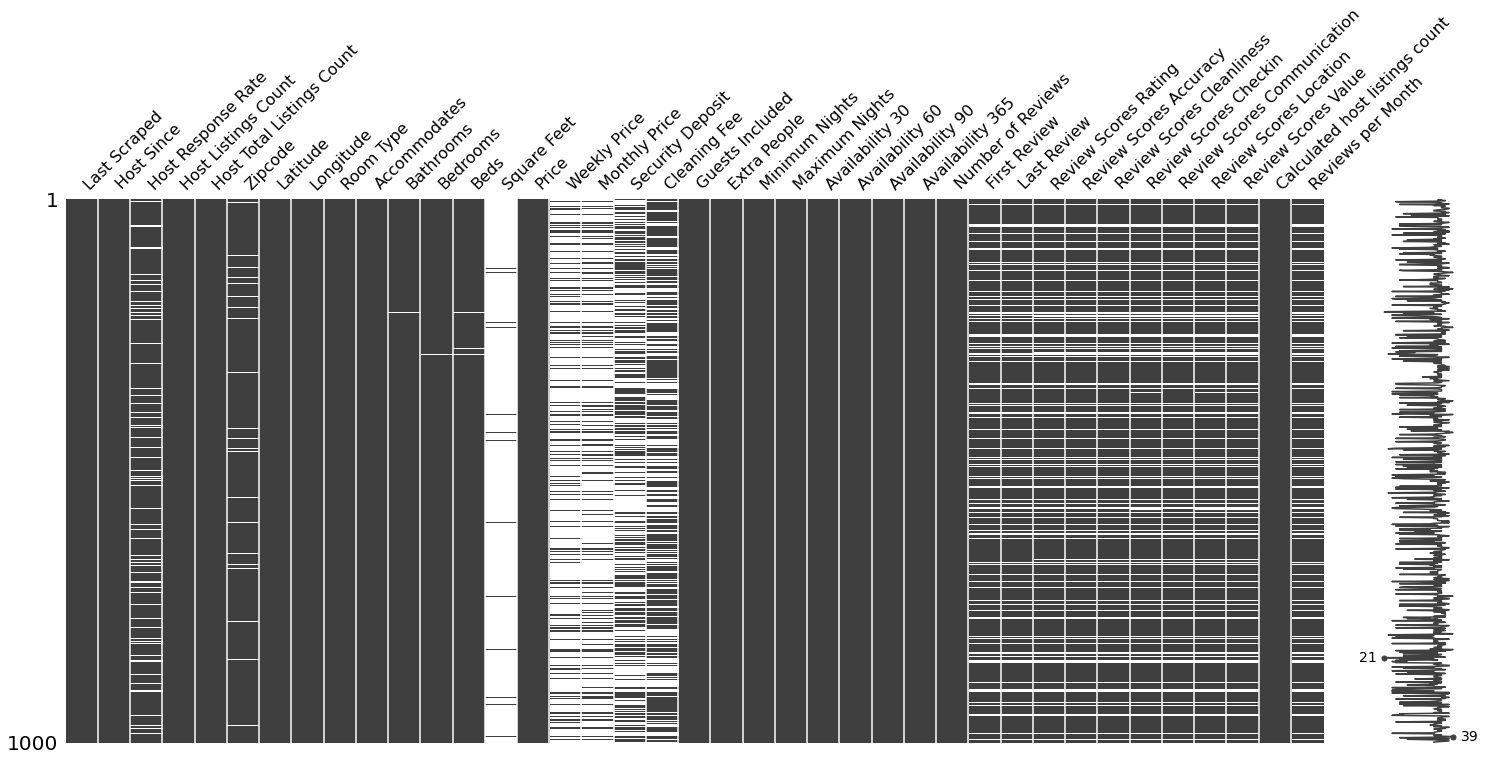

In [31]:
import missingno as msno

msno.matrix(data_prefilter)

In [32]:
# Observamos los porcentajes de missing data
data_prefilter.isna().mean()*100

Last Scraped                       0.0
Host Since                         0.0
Host Response Rate                12.0
Host Listings Count                0.0
Host Total Listings Count          0.0
Zipcode                            3.7
Latitude                           0.0
Longitude                          0.0
Room Type                          0.0
Accommodates                       0.0
Bathrooms                          0.3
Bedrooms                           0.3
Beds                               0.4
Square Feet                       97.6
Price                              0.0
Weekly Price                      76.2
Monthly Price                     76.6
Security Deposit                  56.6
Cleaning Fee                      41.8
Guests Included                    0.0
Extra People                       0.0
Minimum Nights                     0.0
Maximum Nights                     0.0
Availability 30                    0.0
Availability 60                    0.0
Availability 90          

In [33]:
# Ya que filtramos vamos a generar una copia del dataset para trabajar con ella en la transformación de variables
data_transform = data_prefilter.copy()

In [34]:
# Vamos a generar una nueva columna partiendo de Last Scraped - Host Since, para obtener la antigüedad del host en años contra la fecha de la última extracción de datos, transformado en entero
data_transform['Host Since in Days'] = (pd.to_datetime(data_transform['Last Scraped']) - pd.to_datetime(data_transform['Host Since'])).dt.days

# Vamos a generar una nueva columna a partir de Last Review - First Review, para obtener la antiguedad de reviews
data_transform['First Review in Days'] = (pd.to_datetime(data_transform['Last Review']) - pd.to_datetime(data_transform['First Review'])).dt.days

# Por ultimo, vamos a generar un par de nuevas columnas que representan los valores categóricos de la variable Room Type, en este caso, vamos a generar una columna para cada tipo de habitación, y en cada columna, vamos a asignar un 1 si el tipo de habitación es el que representa la columna, y 0 en caso contrario
data_transform = pd.concat([data_transform, pd.get_dummies(data_transform['Room Type'])], axis=1)



In [35]:
# Ahora eliminamos las columnas sobrantes y también las que tienen mucha missing data

data_transform = data_transform.drop(['Host Since', 'Last Scraped', 'First Review', 'Last Review', 'Room Type', 'Square Feet'], axis=1)


In [36]:
# Contamos cuantos valores unicos tenemos en la columna Zipcode y cuales son
print(data_transform['Zipcode'].value_counts())
# Las inconsistencias que tenemos las vamos a corregir, donde se tiene \n vamos a dejar el segundo valor
data_transform['Zipcode'] = data_transform['Zipcode'].apply(lambda x: x.split('\n')[1] if type(x) == str and '\n' in x else x)
# donde tenemos Texto, dejamos solo el valor numerico
data_transform['Zipcode'] = data_transform['Zipcode'].apply(lambda x: x.split(' ')[1] if type(x) == str and ' ' in x else x)
# Donde tenemos carácteres diferentes a numeros, lo dejamos como NaN
data_transform['Zipcode'] = data_transform['Zipcode'].apply(lambda x: np.nan if type(x) == str and not x.isdigit() else x)
# Transformamos la columna Zipcode a numerica
data_transform['Zipcode'] = pd.to_numeric(data_transform['Zipcode'])


28012    143
28004    116
28005     99
28013     74
28014     57
28015     44
28045     42
28010     28
28007     26
28008     25
28009     24
28028     23
28003     19
28011     18
28020     18
28019     14
28002     13
28001     12
28025     10
28050     10
28035     10
28006     10
28039      9
28033      9
28047      8
28017      8
28030      8
28026      8
28016      7
28043      6
28038      6
28042      6
28027      6
28036      5
28053      5
28029      5
28021      4
28040      3
28022      3
28018      3
28032      2
28034      2
28024      2
28044      2
28041      2
28037      2
2804       1
28055      1
28051      1
25008      1
28023      1
2015       1
28031      1
Name: Zipcode, dtype: int64


In [37]:
data_transform.isna().mean()*100

Host Response Rate                12.0
Host Listings Count                0.0
Host Total Listings Count          0.0
Zipcode                            3.7
Latitude                           0.0
Longitude                          0.0
Accommodates                       0.0
Bathrooms                          0.3
Bedrooms                           0.3
Beds                               0.4
Price                              0.0
Weekly Price                      76.2
Monthly Price                     76.6
Security Deposit                  56.6
Cleaning Fee                      41.8
Guests Included                    0.0
Extra People                       0.0
Minimum Nights                     0.0
Maximum Nights                     0.0
Availability 30                    0.0
Availability 60                    0.0
Availability 90                    0.0
Availability 365                   0.0
Number of Reviews                  0.0
Review Scores Rating              19.3
Review Scores Accuracy   

<ipython-input-38-dcdfbd1ddd2c>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


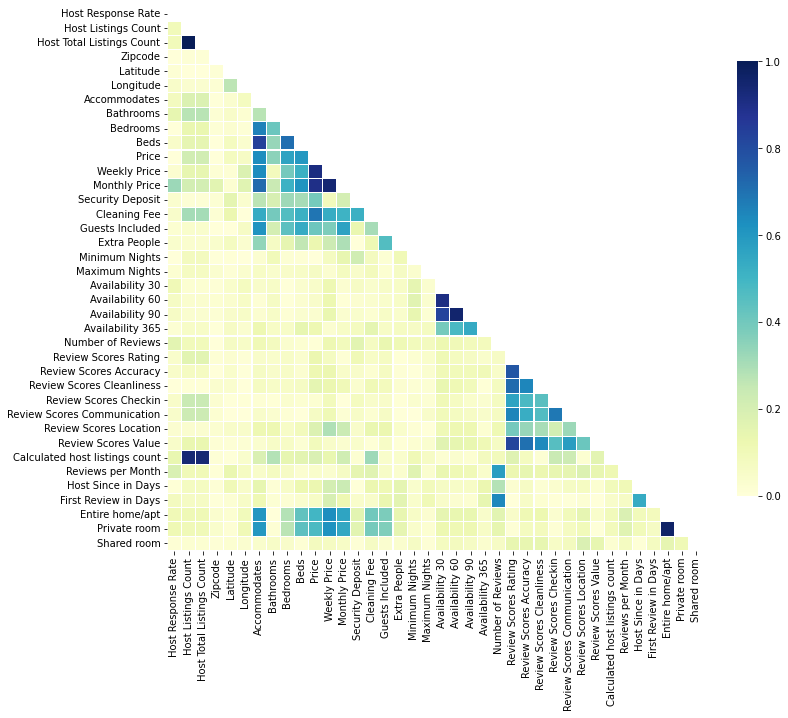

In [38]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data_transform.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [41]:
# Obtenemos las variables que están menor correlacionadas con price, esto es que sean menor a 0.10
corr['Price'].sort_values(ascending=True).head(16)

Minimum Nights                 0.000049
Host Response Rate             0.003440
Zipcode                        0.003689
Number of Reviews              0.008873
Review Scores Checkin          0.023489
Availability 90                0.031963
Reviews per Month              0.045068
Availability 60                0.048982
Availability 30                0.051778
First Review in Days           0.061523
Longitude                      0.063763
Maximum Nights                 0.066686
Review Scores Communication    0.070192
Latitude                       0.081286
Shared room                    0.084528
Review Scores Value            0.092513
Name: Price, dtype: float64

In [42]:
# Las guardamos en una lista
low_corr = corr['Price'].sort_values(ascending=True).head(16).index.tolist()
low_corr

['Minimum Nights',
 'Host Response Rate',
 'Zipcode',
 'Number of Reviews',
 'Review Scores Checkin',
 'Availability 90',
 'Reviews per Month',
 'Availability 60',
 'Availability 30',
 'First Review in Days',
 'Longitude',
 'Maximum Nights',
 'Review Scores Communication',
 'Latitude',
 'Shared room',
 'Review Scores Value']

In [43]:
# Las eliminamos del dataset
data_transform = data_transform.drop(low_corr, axis=1)

<ipython-input-46-dcdfbd1ddd2c>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


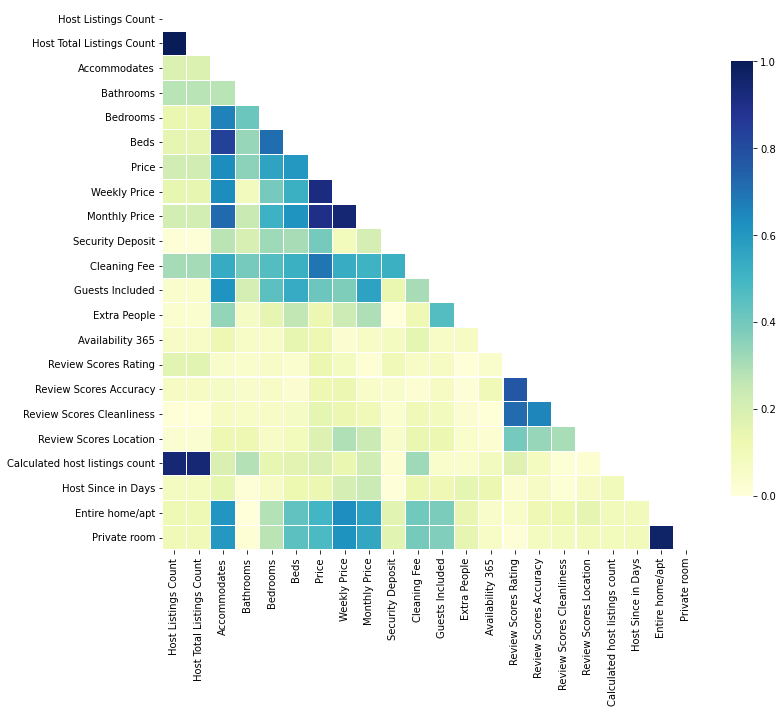

In [46]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data_transform.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [47]:
## Vamos a guardar los datos en un csv y de ahi los volvemos a tomar
data_transform.to_csv('data_transform.csv', index=False)

In [ ]:
# Escalamos las imágenes
images = images / 255.0

In [51]:
## Hay que dividir en train y test, pero no solo los datos transformados, también los datos de las imágenes
from sklearn.model_selection import train_test_split
split = train_test_split(data_transform, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

print(f'Dimensiones del dataset de training: {trainAttrX.shape}')
print(f'Dimensiones del dataset de test: {testAttrX.shape}')
print(f'Dimensiones del dataset de imágenes de training: {trainImagesX.shape}')
print(f'Dimensiones del dataset de imágenes test: {testImagesX.shape}')

# Guardamos
trainAttrX.to_csv('./trainAttrX.csv', sep=';', decimal='.', index=False)
testAttrX.to_csv('./testAttrX.csv', sep=';', decimal='.', index=False)
np.save('trainImagesX.npy', trainImagesX)
np.save('testImagesX.npy', testImagesX)


Dimensiones del dataset de training: (750, 22)
Dimensiones del dataset de test: (250, 22)
Dimensiones del dataset de imágenes de training: (750, 224, 224, 3)
Dimensiones del dataset de imágenes test: (250, 224, 224, 3)


In [52]:
## Movemos a nuestra carpeta
# Comandos para copiar 
!cp trainAttrX.csv /content/drive/My\ Drive/deep-learning-rogelio/trainAttrX.csv
!cp testAttrX.csv /content/drive/My\ Drive/deep-learning-rogelio/testAttrX.csv
!cp trainImagesX.npy /content/drive/My\ Drive/deep-learning-rogelio/trainImagesX.npy
!cp testImagesX.npy /content/drive/My\ Drive/deep-learning-rogelio/testImagesX.npy